In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import json 

# The Data Sets - Abalone 

In [2]:
abalones_df = pd.read_csv('COMP472-A1-datasets/abalone.csv')
# print(penguins_df.head())

In [3]:
# print csv file info
print(abalones_df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


In [4]:
# # label encoding string values to int
le = preprocessing.LabelEncoder()
abalones_df['Type'] = le.fit_transform(abalones_df['Type'])

print(abalones_df.info()) 
print(abalones_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   int64  
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB
None
   Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0     0         0.605     0.470   0.165       1.1775         0.6110   
1     2         0.550     0.425   0.150       0.8315         0.4110   
2     2         0.460     0.345   0.110       0.4595         0.2350   
3     0         0.650     0.475   0.165       1.3875         0.5800  

In [5]:
# converting the features into 1-hot vectors
# abalones_df = pd.get_dummies(abalones_df, columns=['Type'], prefix='Type', dtype='int64')
# print(abalones_df.info()) 
# print(abalones_df.head())

# Note we've left this commented out to not affect columns of the table being used for the rest of the results

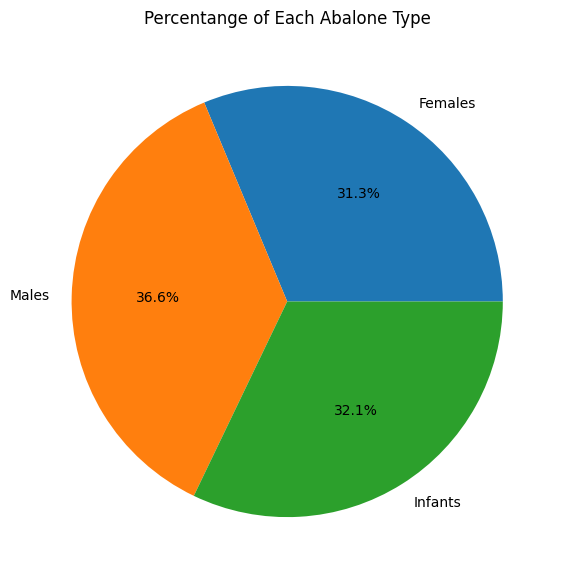

In [6]:
# plot pie chart based on output class species
total = abalones_df['Type'].count()

num_females = abalones_df[abalones_df['Type'] == 0]['Type'].count()
percent_females= num_females / total * 100

num_infants = abalones_df[abalones_df['Type'] == 1]['Type'].count()
percent_infants = num_infants / total * 100

num_males = abalones_df[abalones_df['Type'] == 2]['Type'].count()
percent_males = num_males / total * 100

species_percentages = [percent_females, percent_males, percent_infants]

plt.figure(figsize=(7, 7))
plt.pie(species_percentages, labels=['Females', 'Males', 'Infants'], autopct='%1.1f%%')
plt.title("Percentange of Each Abalone Type")
plt.savefig('ablone_types_pie_chart.png')

plt.show()

# Note: dataset fairly balanced in terms of abalone types

# balanced dataset : accuracy 

In [7]:
# split data into training and testing sets
# default split is 25% testing, 75% training
# data is shuffled by default, but no seeding applied 

X, y = [abalones_df.drop('Type', axis=1), abalones_df['Type']]

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y)

### Generate Performance Measures File

In [8]:
with open('abalone-performance.txt', 'w') as f:
    f.write('Performance Measures \n\n\n')

In [ ]:
with open('abalone-performance_5_runs.txt', 'w') as f:
    f.write('Performance Measures \n\n\n')

# Base-DT
=> a decision tree with the default parameters 

'abalone_types_base_dt.pdf'

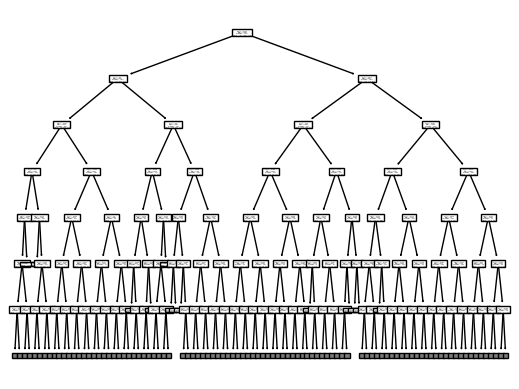

In [9]:
# default parameter for criterion = Gini impurity 
dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train_set, y_train_set)
tree.plot_tree(dtc, max_depth=6)

dot_data = tree.export_graphviz(dtc, out_file=None,
    feature_names= ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
    class_names=['F','M','I'],
    filled=True, 
    rounded=True,
    max_depth=6,)
graph = graphviz.Source(dot_data) 

graph.render("abalone_types_base_dt")   # save to pdf

In [10]:
y_predict = dtc.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
3961         0.575     0.485   0.165       1.0405         0.4190   
4078         0.580     0.455   0.120       0.9400         0.3990   
2582         0.215     0.165   0.055       0.0590         0.0265   
2504         0.670     0.585   0.160       1.3090         0.5445   
3841         0.505     0.395   0.105       0.5510         0.2480   
...            ...       ...     ...          ...            ...   
1500         0.495     0.380   0.145       0.5000         0.2050   
2618         0.315     0.245   0.085       0.1435         0.0530   
1707         0.280     0.205   0.055       0.1135         0.0450   
3598         0.430     0.330   0.100       0.4490         0.2540   
3722         0.550     0.435   0.140       0.7535         0.3285   

      VisceraWeight  ShellWeight  Rings  
3961         0.2640       0.3000     14  
4078         0.2570       0.2650     11  
2582         0.0125       0.0185      5  
2504         0.

# Base-DT Performance Measures 

In [11]:
with open('abalone-performance.txt', 'a') as f:
    f.write('**********************************************************\n\n(A) Base-DT Performance Measures \n\n')
    f.write('Hyperparameters: \n \t- criterion: Gini impurity \n\t- max_depth: 6 \n\t- min_samples_split: 2 \n\n')
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Base-DT code above 5 times. 

In [ ]:
base_dt_accuracy_scores = []
base_dt_f1_scores_macro_avgs = []
base_dt_f1_scores_weighted_avgs = []

for i in range(5):
    # default parameter for criterion = Gini impurity 
    dtc = tree.DecisionTreeClassifier()

    dtc.fit(X_train_set, y_train_set)
    tree.plot_tree(dtc, max_depth=6)

    dot_data = tree.export_graphviz(dtc, out_file=None,
        feature_names= ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
        class_names=['F','M','I'],
        filled=True, 
        rounded=True,
        max_depth=6,)
    graph = graphviz.Source(dot_data) 

    # graph.render("abalone_types_base_dt")   # save to pdf

    y_predict = dtc.predict(X_test_set)

    accuracy = accuracy_score(y_test_set, y_predict)
    base_dt_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    base_dt_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    base_dt_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    with open('abalone-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Base-DT Performance Measures \n\n')
        f.write('Hyperparameters: \n \t- criterion: Gini impurity \n\t- max_depth: None \n\t- min_samples_split: 2 \n\n')
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

# Top-DT
=> a Decision Tree found using a gridsearch 

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 300}


'abalone_types_top_dt.pdf'

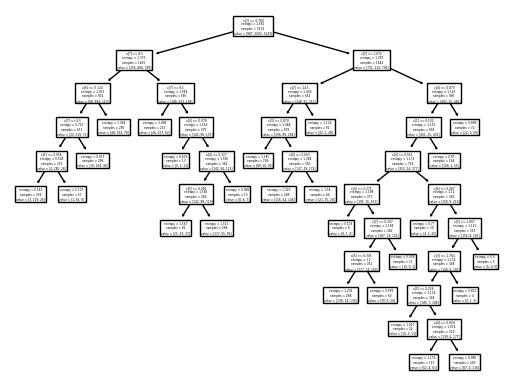

In [12]:
# create decision tree model
dtc_top_dt = tree.DecisionTreeClassifier()

# define hyperparameters to test for best model
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 6, 2],
    'min_samples_split': [35, 150, 300],
}

# use grid search to find best hyperparameters
gs = GridSearchCV(dtc_top_dt, hyperparameters, verbose=1)
gs.fit(X_train_set, y_train_set)
best_hyperparameters = gs.best_params_

print('Best hyperparameters:\n', best_hyperparameters)

# create decision tree model with best hyperparameters
dtc_top_dt_best_params = tree.DecisionTreeClassifier(**best_hyperparameters)
# train model with best hyperparameters
dtc_top_dt_best_params.fit(X_train_set, y_train_set)

# plot decision tree
tree.plot_tree(dtc_top_dt_best_params)

dot_data = tree.export_graphviz(dtc_top_dt_best_params, out_file=None,
    feature_names= ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
    class_names=['F','M','I'],
    filled=True, 
    rounded=True,
)
graph = graphviz.Source(dot_data) 

graph.render("abalone_types_top_dt")   # save to pdf

In [13]:
y_predict = dtc_top_dt_best_params.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
3961         0.575     0.485   0.165       1.0405         0.4190   
4078         0.580     0.455   0.120       0.9400         0.3990   
2582         0.215     0.165   0.055       0.0590         0.0265   
2504         0.670     0.585   0.160       1.3090         0.5445   
3841         0.505     0.395   0.105       0.5510         0.2480   
...            ...       ...     ...          ...            ...   
1500         0.495     0.380   0.145       0.5000         0.2050   
2618         0.315     0.245   0.085       0.1435         0.0530   
1707         0.280     0.205   0.055       0.1135         0.0450   
3598         0.430     0.330   0.100       0.4490         0.2540   
3722         0.550     0.435   0.140       0.7535         0.3285   

      VisceraWeight  ShellWeight  Rings  
3961         0.2640       0.3000     14  
4078         0.2570       0.2650     11  
2582         0.0125       0.0185      5  
2504         0.

# Top-DT Performance Measures 

In [14]:
with open('abalone-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Top-DT Performance Measures \n\n')
    f.write("Hyperparameters: " + str(json.dump(best_hyperparameters, f)) + "\n\n")
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Top-DT code above 5 times. 

In [ ]:
top_dt_accuracy_scores = []
top_dt_f1_scores_macro_avgs = []
top_dt_f1_scores_weighted_avgs = []

for i in range(5):
     # create decision tree model
    dtc_top_dt = tree.DecisionTreeClassifier()

    # define hyperparameters to test for best model
    hyperparameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 6, 2],
        'min_samples_split': [35, 150, 300],
    }

    # use grid search to find best hyperparameters
    gs = GridSearchCV(dtc_top_dt, hyperparameters, verbose=1)
    gs.fit(X_train_set, y_train_set)
    best_hyperparameters = gs.best_params_

    print('Best hyperparameters:\n', best_hyperparameters)

    # create decision tree model with best hyperparameters
    dtc_top_dt_best_params = tree.DecisionTreeClassifier(**best_hyperparameters)
    # train model with best hyperparameters
    dtc_top_dt_best_params.fit(X_train_set, y_train_set)

    # plot decision tree
    tree.plot_tree(dtc_top_dt_best_params)

    dot_data = tree.export_graphviz(dtc_top_dt_best_params, out_file=None,
        feature_names= ['LongestShell', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'],
        class_names=['F','M','I'],
        filled=True, 
        rounded=True,
    )
    graph = graphviz.Source(dot_data) 

    # graph.render("abalone_types_top_dt")   # save to pdf
    
    y_predict = dtc_top_dt_best_params.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    top_dt_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    top_dt_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    top_dt_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    with open('abalone-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Top-DT Performance Measures \n\n')
        f.write("Hyperparameters: " + str(json.dump(best_hyperparameters, f)) + "\n\n")
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

# Base-MLP
=> a Multi-Layered Perceptron with 2 hidden layers of 100+100 neurons, sigmoid/logistic as activation function, stochastic gradient descent, and default values for the rest of the parameters

In [15]:
# activation = 'logistic' => sigmoid function
# solver = 'sgd' => stochastic gradient descent
# default max_iter = 200 (number of epochs)
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
mlp.fit(X_train_set, y_train_set)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100),
              solver='sgd')

In [16]:
y_predict = mlp.predict(X_test_set)
print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
3961         0.575     0.485   0.165       1.0405         0.4190   
4078         0.580     0.455   0.120       0.9400         0.3990   
2582         0.215     0.165   0.055       0.0590         0.0265   
2504         0.670     0.585   0.160       1.3090         0.5445   
3841         0.505     0.395   0.105       0.5510         0.2480   
...            ...       ...     ...          ...            ...   
1500         0.495     0.380   0.145       0.5000         0.2050   
2618         0.315     0.245   0.085       0.1435         0.0530   
1707         0.280     0.205   0.055       0.1135         0.0450   
3598         0.430     0.330   0.100       0.4490         0.2540   
3722         0.550     0.435   0.140       0.7535         0.3285   

      VisceraWeight  ShellWeight  Rings  
3961         0.2640       0.3000     14  
4078         0.2570       0.2650     11  
2582         0.0125       0.0185      5  
2504         0.

# Base-MLP Performance Measures 

In [17]:
with open('abalone-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Base-MLP Performance Measures \n\n')
    f.write('Hyperparameters: \n \t- hidden_layer_sizes: (100, 100) \n\t- activation: logistic \n\t- solver: sgd \n\t- max_iter = 200 \n\t- shuffle = true \n\n')
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Base-MLP code above 5 times. 

In [ ]:
base_mlp_accuracy_scores = []
base_mlp_f1_scores_macro_avgs = []
base_mlp_f1_scores_weighted_avgs = []


for i in range(5):
    # activation = 'logistic' => sigmoid function
    # solver = 'sgd' => stochastic gradient descent
    # default max_iter = 200 (number of epochs)
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd')
    mlp.fit(X_train_set, y_train_set)
    
    y_predict = dtc_top_dt_best_params.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    base_mlp_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    base_mlp_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    base_mlp_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    
    with open('abalone-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Base-MLP Performance Measures \n\n')
        f.write('Hyperparameters: \n \t- hidden_layer_sizes: (100, 100) \n\t- activation: logistic \n\t- solver: sgd \n\t- max_iter = 200 \n\t- shuffle = true \n\n')
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))

# Top-MLP
=> a Multi-Layered Perceptron found using grid search

In [18]:
mlp_top = MLPClassifier()


# define hyperparameters to test for best model
hyperparameters = {
    'activation': ['logistic', 'tanh', 'relu'],
    'hidden_layer_sizes': [(100, 150), (200, 200, 200)],
    'solver': ['adam', 'sgd'],
    'max_iter': [1500],
}

# use grid search to find best hyperparameters
gs = GridSearchCV(mlp_top, hyperparameters, verbose=1)
gs.fit(X_train_set, y_train_set)
best_hyperparameters = gs.best_params_

print('Best hyperparameters:\n', best_hyperparameters)

# create decision tree model with best hyperparameters
mlp_top_best_params = MLPClassifier(**best_hyperparameters)

# train model with best hyperparameters
mlp_top_best_params.fit(X_train_set, y_train_set)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters:
 {'activation': 'relu', 'hidden_layer_sizes': (100, 150), 'max_iter': 1500, 'solver': 'adam'}


MLPClassifier(hidden_layer_sizes=(100, 150), max_iter=1500)

In [19]:
y_predict = mlp_top_best_params.predict(X_test_set)

print(X_test_set)
print("Predicted output: ", le.inverse_transform(y_predict))

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
3961         0.575     0.485   0.165       1.0405         0.4190   
4078         0.580     0.455   0.120       0.9400         0.3990   
2582         0.215     0.165   0.055       0.0590         0.0265   
2504         0.670     0.585   0.160       1.3090         0.5445   
3841         0.505     0.395   0.105       0.5510         0.2480   
...            ...       ...     ...          ...            ...   
1500         0.495     0.380   0.145       0.5000         0.2050   
2618         0.315     0.245   0.085       0.1435         0.0530   
1707         0.280     0.205   0.055       0.1135         0.0450   
3598         0.430     0.330   0.100       0.4490         0.2540   
3722         0.550     0.435   0.140       0.7535         0.3285   

      VisceraWeight  ShellWeight  Rings  
3961         0.2640       0.3000     14  
4078         0.2570       0.2650     11  
2582         0.0125       0.0185      5  
2504         0.

## Top-MLP Performance Measures

In [20]:
with open('abalone-performance.txt', 'a') as f:
    f.write('\n\n\n**********************************************************\n\n(A) Top-MLP Performance Measures \n\n')
    f.write("Hyperparameters: " + str(json.dump(best_hyperparameters, f)) + "\n\n")
    f.write('\n(B) Confusion Matrix: \n')
    f.write(str(confusion_matrix(y_test_set, y_predict)))
    f.write('\n\n(C - D) Classification Report: \n')
    f.write(str(classification_report(y_test_set, y_predict)))
    f.write('\n(C - D) Accuracy Score: ')
    f.write(str(accuracy_score(y_test_set, y_predict)))

Re-run the Top-MLP code above 5 times. 

In [ ]:
top_mlp_accuracy_scores = []
top_mlp_f1_scores_macro_avgs = []
top_mlp_f1_scores_weighted_avgs = []


for i in range(5):
    mlp_top = MLPClassifier()


    # define hyperparameters to test for best model
    hyperparameters = {
        'activation': ['logistic', 'tanh', 'relu'],
        'hidden_layer_sizes': [(100, 150), (200, 200, 200)],
        'solver': ['adam', 'sgd'],
        'max_iter': [1500],
    }

    # use grid search to find best hyperparameters
    gs = GridSearchCV(mlp_top, hyperparameters, verbose=1)
    gs.fit(X_train_set, y_train_set)
    best_hyperparameters = gs.best_params_

    print('Best hyperparameters:\n', best_hyperparameters)

    # create decision tree model with best hyperparameters
    mlp_top_best_params = MLPClassifier(**best_hyperparameters)

    # train model with best hyperparameters
    mlp_top_best_params.fit(X_train_set, y_train_set)
    
    y_predict = dtc_top_dt_best_params.predict(X_test_set)

    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))

    accuracy = accuracy_score(y_test_set, y_predict)
    top_mlp_accuracy_scores.append(accuracy)
    
    f1_score_macro_avg = f1_score(y_test_set, y_predict, average='macro')
    top_mlp_f1_scores_macro_avgs.append(f1_score_macro_avg)
    
    f1_score_weighted_avg = f1_score(y_test_set, y_predict, average='weighted')
    top_mlp_f1_scores_weighted_avgs.append(f1_score_weighted_avg)
    
    print(X_test_set)
    print("Predicted output: ", le.inverse_transform(y_predict))
    
    with open('penguin-performance_5_runs.txt', 'a') as f:
        f.write(f'\n\n\n**********************************************************\n\nRUN {i + 1} \n\n(A) Top-MLP Performance Measures \n\n')
        f.write("Hyperparameters: " + str(json.dump(best_hyperparameters, f)) + "\n\n")
        f.write('\n(B) Confusion Matrix: \n')
        f.write(str(confusion_matrix(y_test_set, y_predict)))
        f.write('\n\n(C - D) Classification Report: \n')
        f.write(str(classification_report(y_test_set, y_predict)))
        f.write('\n(C - D) Accuracy Score: ')
        f.write(str(accuracy))